# Ethan Ooi | kNN Lab 1

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score
import random
import matplotlib.pyplot as plt

In [2]:
# Functions.py
# Import Libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# %%
# Calculate prevalence
def prev(y):
    return y.mean()

# %%
# One-hot encode categorical variables
def binary_encode(df, col, pos_col):
    df[col] = df[col].apply(lambda x: 1 if x == pos_col else 0)
    
# %%
# Select columns from the dataframe into a new dataframe
def select_cols(df, cols):
    return df[cols].copy()

# %%
# Split your training features and target feature
def split_target(df, target, features):
    y = df[target].copy()
    X = df[features].copy()
    if target in X.columns:
        X = X.drop(columns=[target])
    return X, y

# %%
# Partition data into training, tuning, and testing with 60/20/20
def train_tune_test_split(X, y, train_size=.6, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=random_state, stratify=y)
    X_tune, X_test, y_tune, y_test = train_test_split(X_temp, y_temp, train_size=.5, random_state=random_state, stratify=y_temp)
    
    return X_train, X_tune, X_test, y_train, y_tune, y_test

# %%
# Standardize continuous variables
def standardize(df, cont_vars):
    df[cont_vars] = StandardScaler().fit_transform(df[cont_vars])
    return df[cont_vars]

# %%
# One-hot encode variables
def one_hot_encode(df, col):
    df = df.copy()
    dummies = pd.get_dummies(df[col], prefix=col+'_', dtype=int)
    df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
    return df

# %%


### 1. Use the question/target variable you submitted and build a model to answer the question you created for this dataset (make sure it is a classification problem, convert if necessary). 

In [3]:
# COLLEGE COMPLETION DATASET

# Step Two:
# Write a generic question that this dataset could address
# Can we predict whether an institution is private given its institutional characteristics?

# What is an independent Business Metric for your problem? Think about the case study examples we have discussed in class.
# We can see if our predictions are correct which will save time when classifying institutions for academic research purposes

# %% 
# Data Preprocessing
# Read data in
df = pd.read_csv('cc_institution_details.csv')

In [4]:
# Select relevant columns
relevant_cols = ['level', 'control', 'flagship', 'hbcu', 'student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
df = select_cols(df, relevant_cols)

In [5]:
# Binary Encode categorical variables
binary_encode(df, 'level', '4-year') # 1 if 4-year institution, 0 if 2-year institution
binary_encode(df, 'flagship', 'X') # 1 if state school, 0 if not
binary_encode(df, 'hbcu', 'X') # 1 if hbcu, 0 if not
df['control'] = (df['control'].apply(lambda x: 1 if (x == 'Private not-for-profit' or x == 'Private for-profit') else 0)) # 1 if private, 0 if public

# Standardize continuous variables
cont_vars = ['student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
df[cont_vars] = standardize(df, cont_vars)

In [6]:
# Select target variable and drop target from training data
feature_list = ['level', 'flagship', 'hbcu', 'student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
X, y = split_target(df, target='control', features=feature_list)

# Train Tune Test Split
X_train, X_tune, X_test, y_train, y_tune, y_test = train_tune_test_split(X, y)

In [7]:
# Calculate prevalence
print(f'The prevalence of private institutions is: {prev(y)}')

The prevalence of private institutions is: 0.5897840968931016


### 2. Build a kNN model to predict your target variable using 3 nearest modelbors. Make sure it is a classification problem, meaning if needed changed the target variable.
 

In [8]:
random.seed(42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [9]:
print(f'Accuracy on our testing data: {model.score(X_test, y_test)}')
print(f'Accuracy on our tuning data: {model.score(X_tune, y_tune)}')

Accuracy on our testing data: 0.9842105263157894
Accuracy on our tuning data: 0.9907894736842106


### 3. Create a dataframe that includes the test target values, test predicted values, and test probabilities of the positive class.


In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'test_target_value': y_test,
    'test_predicted_value': y_pred,
    "test_pos_prob": y_prob
})

results_df.head()

,test_target_value,test_predicted_value,test_pos_prob
945,0,0,0.0
469,0,0,0.0
3503,1,1,1.0
1506,0,0,0.0
2403,1,1,1.0


### 4. No code question: If you adjusted the k hyperparameter what do you think would happen to the threshold function? Would the confusion look the same at the same threshold levels or not? Why or why not?

If we adjusted k, our threshold function would change because the threshold directly depends on k. When we change k, we also change the probabilities in our kNN so the same threshold value could lead to different classifications in our output, which will lead to different patterns and new errors. The confusion matrix would change for this exact reason, because the classifications will be changed and we would get a different output, the confusion matrix would change too.

### 5. Evaluate the results using the confusion matrix. Then "walk" through your question, summarize what concerns or positive elements do you have about the model as it relates to your question? 

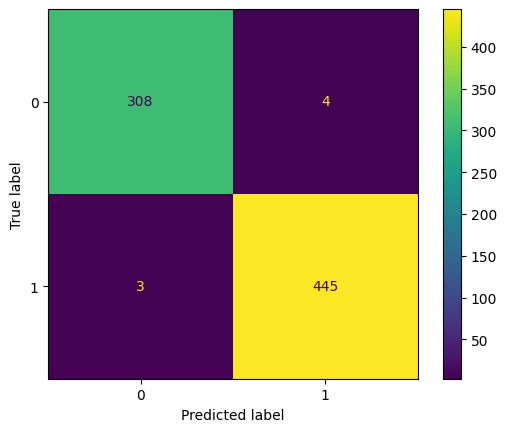

In [11]:
# create a confusion matrix
y_tune_pred = model.predict(X_tune)

disp = ConfusionMatrixDisplay(confusion_matrix(y_tune, y_tune_pred))
disp.plot()

In [12]:
print(classification_report(y_tune, y_tune_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       312
           1       0.99      0.99      0.99       448

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760



In [13]:
sensitivity = 445/(445+3) # TP / (TP + FN)
specificity = 308/(308+4) # TN / (TN + FP)
print(sensitivity, specificity)

0.9933035714285714 0.9871794871794872


In [14]:
def chooseK(k, X_train, y_train, X_test, y_test):
    random.seed(42)
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(X_train, y_train)
    
    # calculate accuracy
    accu = class_knn.score(X_test, y_test)
    return accu

In [15]:
test = pd.DataFrame({'k':list(range(1,22,2)), 
                     'accu':[chooseK(x, X_train, y_train, X_test, y_test) for x in list(range(1, 22, 2))]})

In [16]:
test.sort_values(by=['accu'], ascending=False)

,k,accu
0,1,0.986842
1,3,0.984211
2,5,0.980263
3,7,0.977632
5,11,0.975000
4,9,0.973684
6,13,0.973684
7,15,0.973684
8,17,0.972368
9,19,0.969737


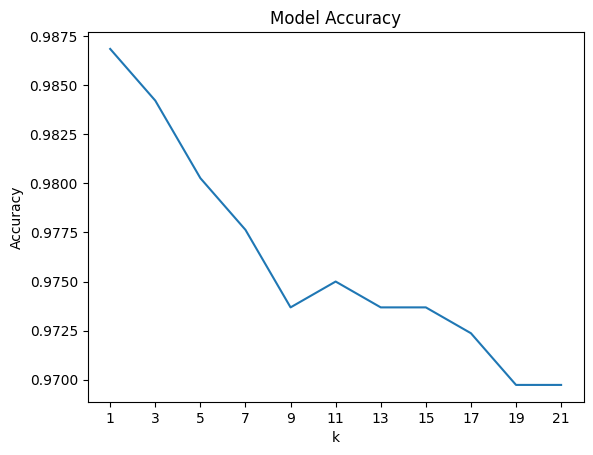

In [17]:
plt.plot(test['k'], test['accu'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 22, 2))
plt.title('Model Accuracy')
plt.show()

### 6. Create two functions: One that cleans the data & splits into training|test and one that allows you to train and test the model with different k and threshold values, then use them to optimize your model (test your model with several k and threshold combinations). Try not to use variable names in the functions, but if you need to that's fine. (If you can't get the k function and threshold function to work in one function just run them separately.) 

In [18]:
def data_prep(csv_path, target, relevant_cols: list, feature_list: list, cont_vars: list):
    # Read data in
    df = pd.read_csv(csv_path)

    # Select relevant columns
    df = select_cols(df, relevant_cols)

    # Binary Encode categorical variables
    binary_encode(df, 'level', '4-year') # 1 if 4-year institution, 0 if 2-year institution
    binary_encode(df, 'flagship', 'X') # 1 if state school, 0 if not
    binary_encode(df, 'hbcu', 'X') # 1 if hbcu, 0 if not
    df['control'] = (df['control'].apply(lambda x: 1 if (x == 'Private not-for-profit' or x == 'Private for-profit') else 0)) # 1 if private, 0 if public

    # Standardize continuous variables
    df[cont_vars] = standardize(df, cont_vars)    

    # Select target variable from training data
    X, y = split_target(df, target=target, features=feature_list)
    
    # Train Tune Test Split
    X_train, X_tune, X_test, y_train, y_tune, y_test = train_tune_test_split(X, y)

    # Calculate prevalence
    print(f'The prevalence of private institutions is: {prev(y)}')

    outputs = [X_train, X_tune, X_test, y_train, y_tune, y_test, df]

    return outputs

# Trains kNN on our testing data, and predicts for another split of our data. This could be either tuning or testing. For our exploration of k & threshold values we will use our tuning data because if we use 
# testing data to optimize our k & threshold for accuracy, this will overfit our model.
def kNN(X_train, X_accuracy, y_train, y_accuracy, k, threshold):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    prob = model.predict_proba(X_accuracy)[:, 1]
    y_pred = (prob >= threshold)
    acc = accuracy_score(y_accuracy, y_pred)
    
    return acc

In [19]:
# Use our data_prep function to clean & train/tune/test split our data
relevant_cols = ['level', 'control', 'flagship', 'hbcu', 'student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
feature_list = ['level', 'flagship', 'hbcu', 'student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
cont_vars = ['student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
X_train, X_tune, X_test, y_train, y_tune, y_test, df = data_prep('cc_institution_details.csv', 'control', relevant_cols, feature_list, cont_vars)

The prevalence of private institutions is: 0.5897840968931016


This means that if we were to guess randomly, we'd have a ~58.98% chance to guess a private school correctly.

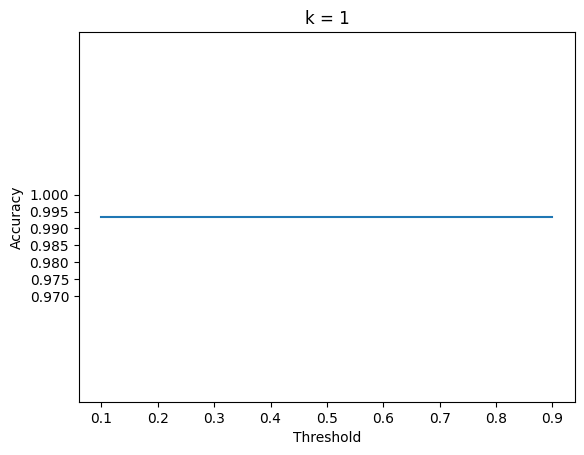

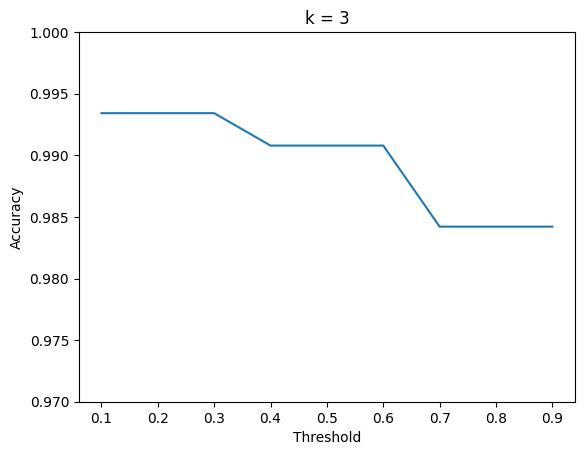

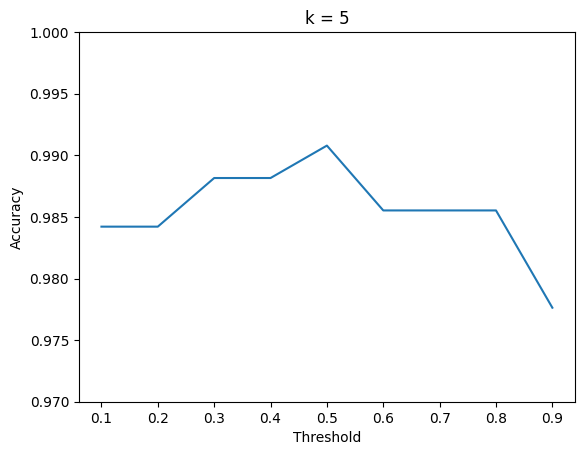

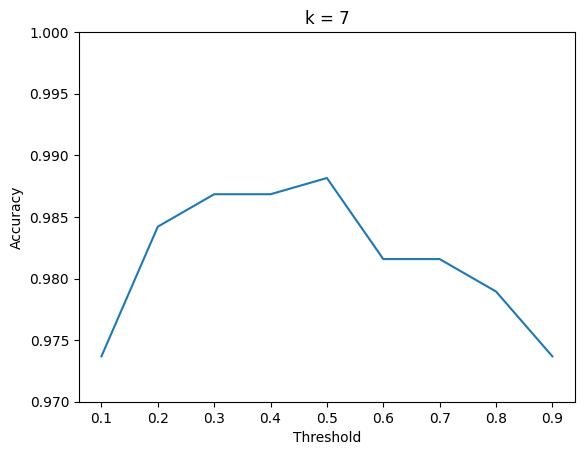

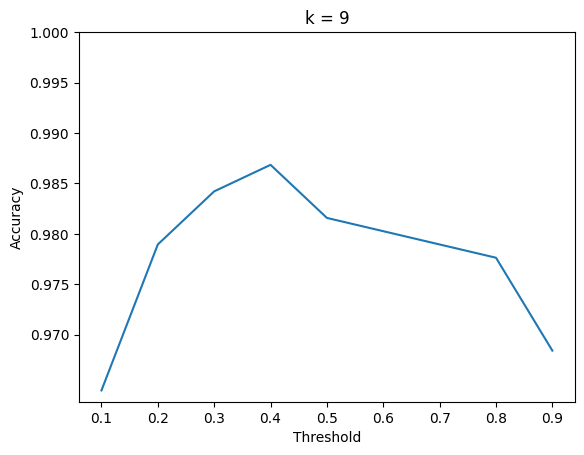

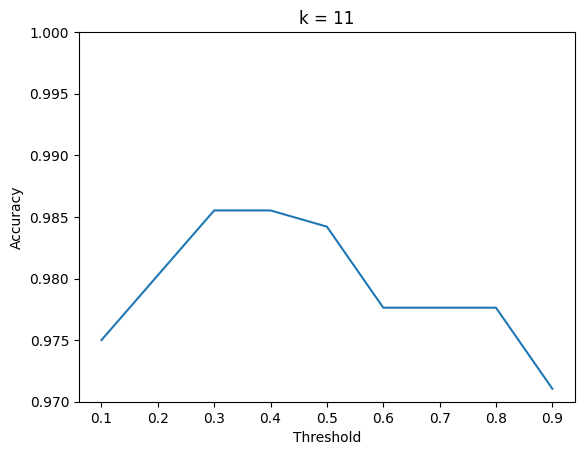

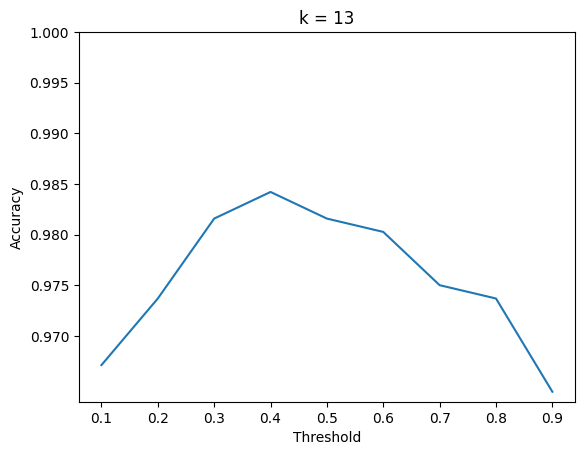

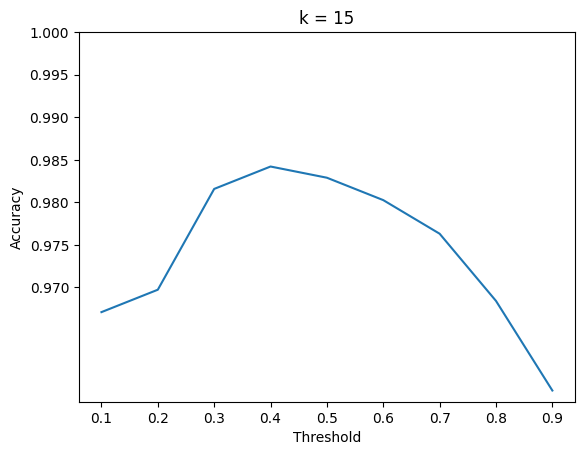

In [20]:
# Select the k values & threshold values we want to explore
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
thresholds = np.arange(.1, 1, .1)

# Iterate through each value of k and threshold, with our kNN function. 
# We are looking to optimize our k & threshold combination through our tuning data which we will later apply to our testing data for the best generalization of our model to new data
for k in k_values:
    accs = []
    for t in thresholds:
        acc = kNN(X_train, X_tune, y_train, y_tune, k=k, threshold=t) # Tuning data only
        accs.append(acc)
    
    # Plot each combination of k & threshold
    plt.plot(thresholds, accs)
    plt.title(f'k = {k}')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.yticks(np.arange(.97, 1, .005))
    plt.show()

We can see that k=1 for any threshold, and k=3 for threshold < .34 are very similar, let's check what their actual values are

In [21]:
print(kNN(X_train, X_tune, y_train, y_tune, 1, .5)) # Testing data
print(kNN(X_train, X_tune, y_train, y_tune, 3, .3))

0.993421052631579
0.993421052631579


They're identical. This makes complete sense because when k=1, the nearest neighbor will classify the new data point. In k=3, if our threshold is below .333, then the nearest neighbor will also classify the new data point.

### 7. How well does the model perform? Did the interaction of the adjusted thresholds and k values help the model? Why or why not? 


In [22]:
print(f'k=1\nthreshold=.5\nAccuracy: {kNN(X_train, X_test, y_train, y_test, 1, .5)}\n')
print(f'k=3\nthreshold=.5\nAccuracy: {kNN(X_train, X_test, y_train, y_test, 3, .5)}')

k=1
threshold=.5
Accuracy: 0.9868421052631579

k=3
threshold=.5
Accuracy: 0.9842105263157894


The model performs very well. We use our optimized combination of either k=1, threshold=.5 or k=3, threshold=.3 and run our model through our testing data and we get an accuracy of .987. The interaction of adjusted thresholds and k values helped our model because if you compare the values to the original of k=3, threshold=.5, our new accuracy is better. We do have to keep in mind that using k=1 can be risky at times because it will classify towards its single nearest neighbor which can be very overfitting for the model. We did use our tuning data to validate our observations though. 

### 8. Choose another variable as the target in the dataset and create another kNN model using the two functions you created in step 7. 

Let's try to classify if a school is a 4-year or a 2-year institution based off its institutional characteristics

In [23]:
relevant_cols = ['level', 'control', 'flagship', 'hbcu', 'student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
feature_list = ['control', 'flagship', 'hbcu', 'student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
cont_vars = ['student_count', 'awards_per_state_value', 'exp_award_state_value', 'fte_value', 'fte_percentile']
X_train, X_tune, X_test, y_train, y_tune, y_test, df = data_prep('cc_institution_details.csv', 'level', relevant_cols, feature_list, cont_vars)

The prevalence of private institutions is: 0.6158504476040021


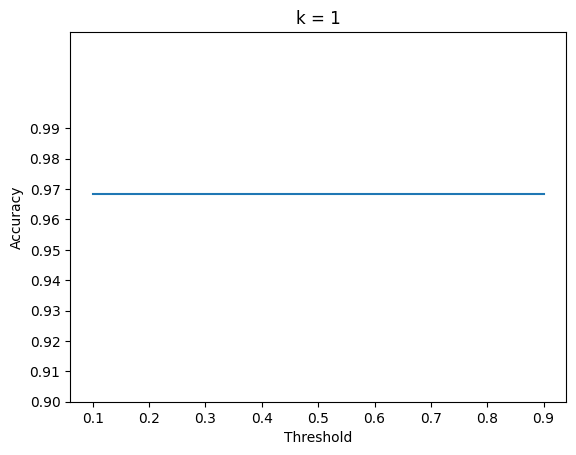

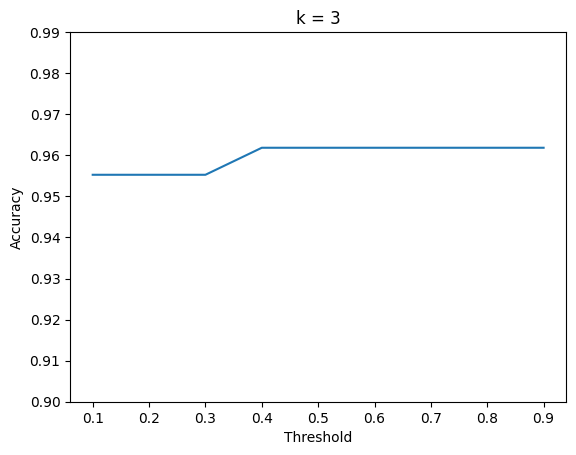

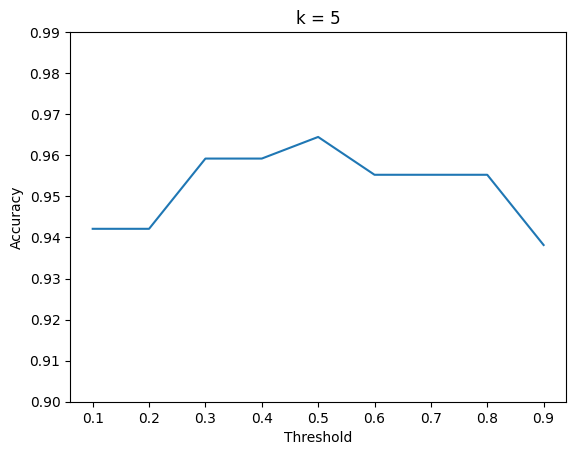

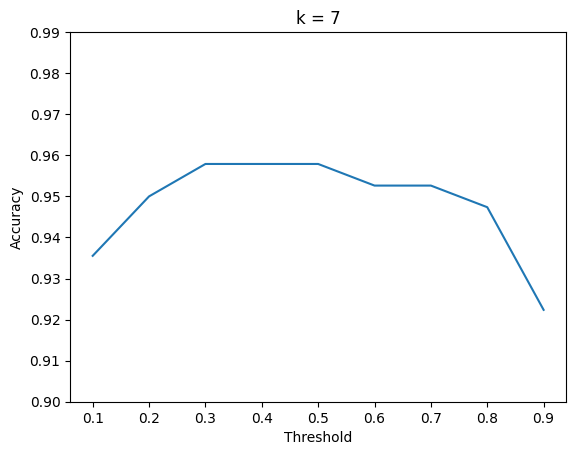

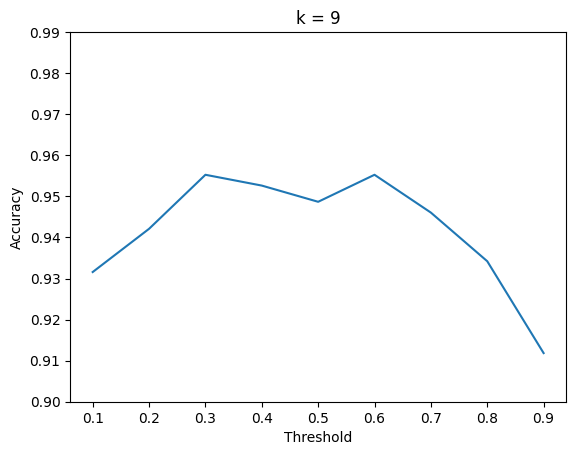

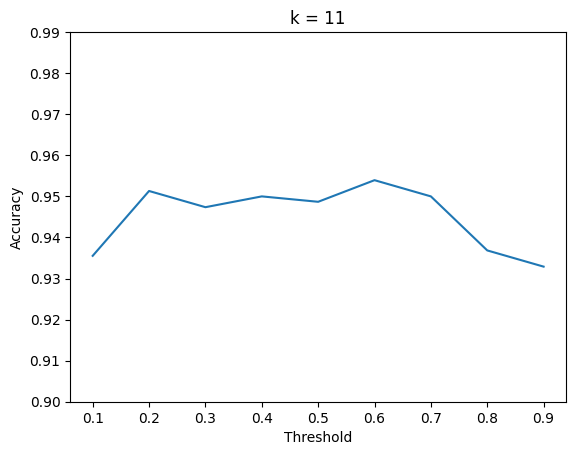

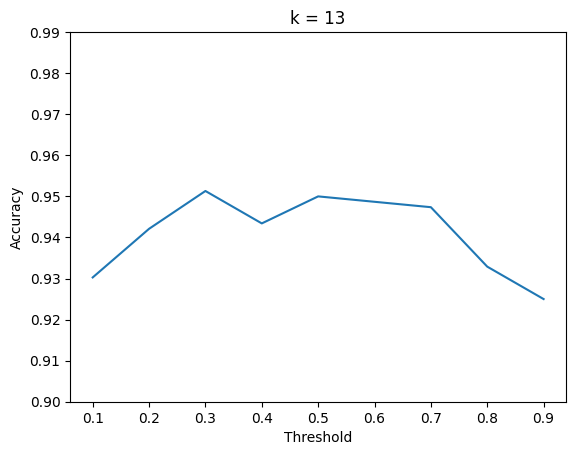

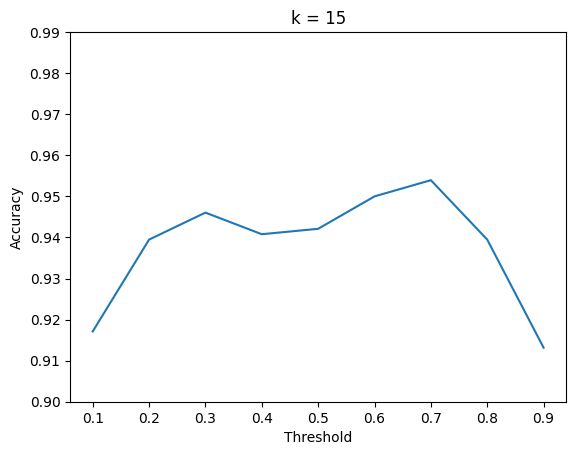

In [24]:
# Select the k values & threshold values we want to explore
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
thresholds = np.arange(.1, 1, .1)

# Iterate through each value of k and threshold, with our kNN function. 
# We are looking to optimize our k & threshold combination through our tuning data which we will later apply to our testing data for the best generalization of our model to new data
for k in k_values:
    accs = []
    for t in thresholds:
        acc = kNN(X_train, X_tune, y_train, y_tune, k=k, threshold=t) # Tuning data only
        accs.append(acc)
    
    # Plot each combination of k & threshold
    plt.plot(thresholds, accs)
    plt.title(f'k = {k}')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.yticks(np.arange(.90, 1, .01))
    plt.show()